In [8]:
from collections import deque

# Matrix (2D Grid)
grid = [[0, 0, 0, 0],
        [1, 1, 0, 0],
        [0, 0, 0, 1],
        [0, 1, 0, 0]]

# Shortest path from top left to bottom right
def bfs(grid):
    ROWS, COLS = len(grid), len(grid[0])
    visit = set()
    queue = deque()
    queue.append((0, 0))
    visit.add((0, 0))

    length = 0
    while queue:
        for i in range(len(queue)):
            r, c = queue.popleft()
            if r == ROWS - 1 and c == COLS - 1:
                return length

            neighbors = [[0, 1], [0, -1], [1, 0], [-1, 0]]
            for dr, dc in neighbors:
                if (min(r + dr, c + dc) < 0 or
                    r + dr == ROWS or c + dc == COLS or
                    (r + dr, c + dc) in visit or grid[r + dr][c + dc] == 1):
                    continue
                queue.append((r + dr, c + dc))
                visit.add((r + dr, c + dc))
        length += 1


Shortest Path in Binary Matrix
Solved 
You are given an n x n binary matrix grid, return the length of the shortest clear path in the matrix. If there is no clear path, return -1.

A clear path in a binary matrix is a path from the top-left cell (i.e., (0, 0)) to the bottom-right cell (i.e., (n - 1, n - 1)) such that:

All the visited cells of the path are 0.
All the adjacent cells of the path are 8-directionally connected (i.e., they are different and they share an edge or a corner).
The length of a clear path is the number of visited cells of this path.

Example 1:

Input: grid = [
    [0,1,0],

    [1,0,0],

    [1,1,0]
]

Output: 3
Example 2:

Input: grid = [
    [1,0],
    
    [1,1]
]

Output: -1

In [2]:
from typing import List
class Solution:
    def shortestPathBinaryMatrix(self, grid: List[List[int]]) -> int:
        N = len(grid)
        if grid[0][0] or grid[N-1][N-1]:
            return -1

        q = deque([(0,0,1)])
        visited = set()
        visited.add((0,0))
        directions = [[0,1],[1,0],[-1,0],[0,-1],[-1,-1],[1,1],[1,-1],[-1,1]]
        while q:
            r,c,l = q.popleft()
            if min(r,c) < 0 or r >= N or c >= N or grid[r][c] == 1:
                continue
            if r == N-1 and c == N-1:
                return l

            for rdir,cdir in directions:
                nr = r + rdir
                nc = c + cdir
                if (nr,nc) not in visited:
                    q.append((nr,nc,l+1))
                    visited.add((nr,nc))
        return -1

Rotting Fruit
You are given a 2-D matrix grid. Each cell can have one of three possible values:

0 representing an empty cell
1 representing a fresh fruit
2 representing a rotten fruit
Every minute, if a fresh fruit is horizontally or vertically adjacent to a rotten fruit, then the fresh fruit also becomes rotten.

Return the minimum number of minutes that must elapse until there are zero fresh fruits remaining. If this state is impossible within the grid, return -1.

Example 1:

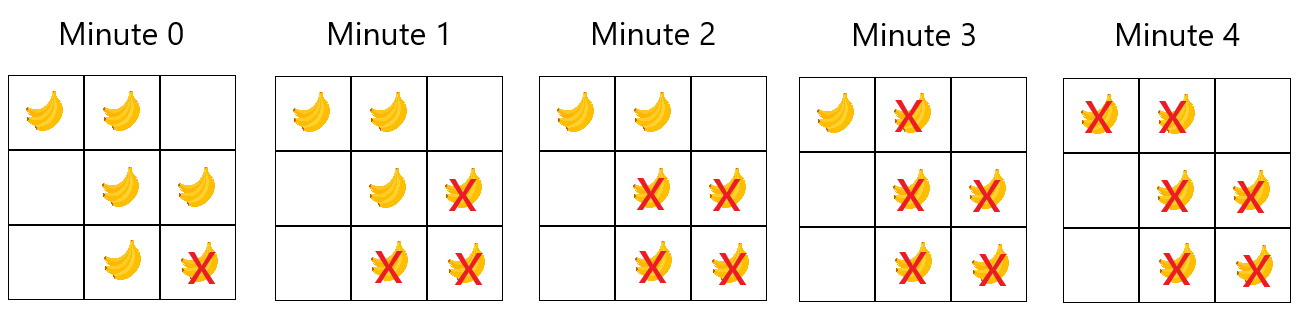

Input: grid = [[1,1,0],[0,1,1],[0,1,2]]

Output: 4
Example 2:

Input: grid = [[1,0,1],[0,2,0],[1,0,1]]

Output: -1
Constraints:

1 <= grid.length, grid[i].length <= 10

In [4]:
from typing import List
from collections import deque
class Solution:
    def orangesRotting(self, grid: List[List[int]]) -> int:
        rotten,empty,fresh = 2,0,1
        freshC, time = 0,0
        q = deque()
        rows,cols = len(grid),len(grid[0])
        directions = [[0,1],[0,-1],[-1,0],[1,0]]
        for i in range(rows):
             for j in range(cols):
                if grid[i][j] == rotten:
                    q.append((i,j))
                elif grid[i][j] == fresh:
                    freshC += 1
        
        while q and freshC:

            for i in range(len(q)):
                r,c = q.popleft()

                for rdir,cdir in directions:
                    nr,nc = r+rdir,c+cdir

                    if min(nr,nc) < 0 or nr >= rows or nc >= cols or grid[nr][nc] != 1:
                        continue
                    
                    grid[nr][nc] = 2
                    q.append((nr,nc))
                    freshC -= 1
            time += 1

        return time if freshC == 0 else -1

grid=[[1,1,0],[0,1,1],[0,1,2]]
Solution().orangesRotting(grid)

4